In [1]:
#acs-trigger-rate

In [2]:
import re
import time
import requests

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline


In [3]:
log_lines = []

for l in open("/home/savchenk/work/integral/ibas/ibas-cgi-bin/offline/var/log/ibas_acsmonitor_log.txt"):
    if re.match(".*? +2021-02-.*?", l):
        log_lines.append(l)
        
        
recent_log = "\n".join(log_lines)
        

In [4]:
events=[]

for l in recent_log.split("\n"):
    for n, rex in [
        (
            '0 - pre-detection',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: The best burst is:  OBT=(?P<obt>.*?)  s=(?P<sigma>.*?)  bgrd=(?P<background>[0-9\.]*)'
        ),
        (
            '1 - background-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]+?) is out of range <5400.0 : 7500.0>'
        ),
        (
            '2 - background-in-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]*?) is in acceptable range <(?P<backgroundl1>[0-9\.]*?) : (?P<backgroundl2>[0-9\.]*?)>'
        ),
        (
            '3 - sc-distance-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: S/C distance (?P<scdistance>[0-9\.]*?) is out of range <(?P<scdistancel1>[0-9\.]*?) : (?P<scdistancel2>[0-9\.]*?)>'
        ),
        (
            '9 - distributed-detection',
            '^.*? +(?P<date>20.*?) .*?LC/EPH: OBT=(.*?) past=(.*?) future=(.*?) delay=(.*?) fname=.*?'
        )
    ]:
        r = re.search(rex, l)
        if r:
            R = r.groupdict()
            print(n, R)
            events.append(
                {**R,
                **dict(
                    event=n,
                    date=R['date'],
                    time_s=time.mktime(time.strptime(R['date'], "%Y-%m-%dT%H:%M:%S"))
                )}
            )

0 - pre-detection {'date': '2021-02-08T21:46:22', 'obt': '46954763.193', 'sigma': '6.001', 'background': '6489.1'}
2 - background-in-range {'date': '2021-02-08T21:46:22', 'background': '6489.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T21:46:22', 'scdistance': '85346.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T21:55:28', 'obt': '46955289.943', 'sigma': '9.167', 'background': '6522.8'}
2 - background-in-range {'date': '2021-02-08T21:55:28', 'background': '6522.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-08T21:55:28', 'scdistance': '84344.7', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-08T21:56:12', 'obt': '46955367.443', 'sigma': '10.078', 'background': '6568.3'}
2 - background-in-range {'date': '2021-02-08T21:56:12', 'background': '6568.3', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-08T23:02:28', 'obt': '46959338.893', 'sigma': '7.211', 'background': '8739.9'}
1 - background-out-of-range {'date': '2021-02-08T23:02:28', 'background': '8739.9'}
0 - pre-detection {'date': '2021-02-08T23:02:44', 'obt': '46959344.543', 'sigma': '11.713', 'background': '8696.4'}
1 - background-out-of-range {'date': '2021-02-08T23:02:44', 'background': '8696.4'}
0 - pre-detection {'date': '2021-02-08T23:05:17', 'obt': '46959500.843', 'sigma': '6.513', 'background': '8839.6'}
1 - background-out-of-range {'date': '2021-02-08T23:05:17', 'background': '8839.6'}
0 - pre-detection {'date': '2021-02-08T23:10:44', 'obt': '46959840.843', 'sigma': '9.096', 'background': '8814.0'}
1 - background-out-of-range {'date': '2021-02-08T23:10:44', 'background': '8814.0'}
0 - pre-detection {'date': '2021-02-08T23:11:00', 'obt': '46959846.043', 'sigma': '9.429', 'background': '8690.6'}
1 - background-out-of-range {'date': '2021-02-08T23:11:00', 'background': '8690.6'}
0 - 

0 - pre-detection {'date': '2021-02-14T01:37:24', 'obt': '47400627.393', 'sigma': '6.276', 'background': '6385.7'}
2 - background-in-range {'date': '2021-02-14T01:37:24', 'background': '6385.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-14T01:37:24'}
0 - pre-detection {'date': '2021-02-14T01:59:24', 'obt': '47401948.043', 'sigma': '6.058', 'background': '6373.5'}
2 - background-in-range {'date': '2021-02-14T01:59:24', 'background': '6373.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-14T01:59:24'}
0 - pre-detection {'date': '2021-02-14T03:00:44', 'obt': '47405662.293', 'sigma': '9.104', 'background': '6369.6'}
2 - background-in-range {'date': '2021-02-14T03:00:44', 'background': '6369.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-14T03:00:44'}
0 - pre-detection {'date': '2021-02-14T03:25:42', 'obt': '47407061.493', 'sigma': '7.

0 - pre-detection {'date': '2021-02-14T07:08:53', 'obt': '47420415.993', 'sigma': '6.372', 'background': '6651.4'}
2 - background-in-range {'date': '2021-02-14T07:08:53', 'background': '6651.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:08:53', 'scdistance': '73564.9', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:14:44', 'obt': '47420912.093', 'sigma': '6.232', 'background': '6657.2'}
2 - background-in-range {'date': '2021-02-14T07:14:44', 'background': '6657.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:14:44', 'scdistance': '72472.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:35:56', 'obt': '47422153.243', 'sigma': '6.397', 'background': '6619.1'}
2 - background-in-range {'date': '2021-02-14T07:35:56', 'background': '6619.1', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-02-16T22:45:40', 'obt': '47649521.093', 'sigma': '8.644', 'background': '6531.5'}
2 - background-in-range {'date': '2021-02-16T22:45:40', 'background': '6531.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:45:40', 'scdistance': '75437.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-16T22:55:08', 'obt': '47650110.593', 'sigma': '6.618', 'background': '6549.6'}
2 - background-in-range {'date': '2021-02-16T22:55:08', 'background': '6549.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:55:08', 'scdistance': '74167.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-19T01:23:33', 'obt': '47831842.393', 'sigma': '11.871', 'background': '6658.0'}
2 - background-in-range {'date': '2021-02-19T01:23:33', 'background': '6658.0', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-22T02:36:13', 'obt': '48095365.793', 'sigma': '9.280', 'background': '6722.2'}
2 - background-in-range {'date': '2021-02-22T02:36:13', 'background': '6722.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:36:13'}
0 - pre-detection {'date': '2021-02-22T02:38:29', 'obt': '48095500.693', 'sigma': '9.171', 'background': '6650.5'}
2 - background-in-range {'date': '2021-02-22T02:38:29', 'background': '6650.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:38:29'}
0 - pre-detection {'date': '2021-02-22T02:38:52', 'obt': '48095514.843', 'sigma': '48.868', 'background': '6638.8'}
2 - background-in-range {'date': '2021-02-22T02:38:52', 'background': '6638.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:38:52'}
0 - pre-detection {'date': '2021-02-22T02:48:20', 'obt': '48096099.193', 'sigma': '9

0 - pre-detection {'date': '2021-02-22T03:36:28', 'obt': '48099003.093', 'sigma': '9.027', 'background': '6673.1'}
2 - background-in-range {'date': '2021-02-22T03:36:28', 'background': '6673.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:36:28', 'scdistance': '94966.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T03:39:48', 'obt': '48099180.943', 'sigma': '16.978', 'background': '6558.9'}
2 - background-in-range {'date': '2021-02-22T03:39:48', 'background': '6558.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:39:49', 'scdistance': '94668.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T03:40:28', 'obt': '48099208.043', 'sigma': '43.845', 'background': '6780.1'}
2 - background-in-range {'date': '2021-02-22T03:40:28', 'background': '6780.1', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-02-22T04:26:05', 'obt': '48101961.043', 'sigma': '9.323', 'background': '6613.2'}
2 - background-in-range {'date': '2021-02-22T04:26:05', 'background': '6613.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:26:05', 'scdistance': '89852.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:26:21', 'obt': '48101971.043', 'sigma': '18.143', 'background': '6802.3'}
2 - background-in-range {'date': '2021-02-22T04:26:21', 'background': '6802.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:26:21', 'scdistance': '89834.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T04:26:36', 'obt': '48101979.493', 'sigma': '50.729', 'background': '6587.1'}
2 - background-in-range {'date': '2021-02-22T04:26:36', 'background': '6587.1', 'backgroundl1': '5400.0', 'ba

0 - pre-detection {'date': '2021-02-22T06:17:09', 'obt': '48108637.143', 'sigma': '9.747', 'background': '8706.4'}
1 - background-out-of-range {'date': '2021-02-22T06:17:09', 'background': '8706.4'}
0 - pre-detection {'date': '2021-02-22T06:17:32', 'obt': '48108657.143', 'sigma': '14.373', 'background': '8591.6'}
1 - background-out-of-range {'date': '2021-02-22T06:17:32', 'background': '8591.6'}
0 - pre-detection {'date': '2021-02-22T06:20:53', 'obt': '48108850.793', 'sigma': '9.037', 'background': '7675.2'}
1 - background-out-of-range {'date': '2021-02-22T06:20:53', 'background': '7675.2'}
0 - pre-detection {'date': '2021-02-22T06:23:57', 'obt': '48109031.043', 'sigma': '9.162', 'background': '8101.6'}
1 - background-out-of-range {'date': '2021-02-22T06:23:57', 'background': '8101.6'}
0 - pre-detection {'date': '2021-02-22T06:25:41', 'obt': '48109140.143', 'sigma': '42.689', 'background': '8991.0'}
1 - background-out-of-range {'date': '2021-02-22T06:25:41', 'background': '8991.0'}
0 -

0 - pre-detection {'date': '2021-02-23T04:20:21', 'obt': '48187845.993', 'sigma': '7.008', 'background': '6765.8'}
2 - background-in-range {'date': '2021-02-23T04:20:21', 'background': '6765.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T04:20:21'}
0 - pre-detection {'date': '2021-02-23T04:30:29', 'obt': '48188625.043', 'sigma': '9.553', 'background': '6785.3'}
2 - background-in-range {'date': '2021-02-23T04:30:29', 'background': '6785.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T04:30:29'}
0 - pre-detection {'date': '2021-02-23T04:34:05', 'obt': '48188825.343', 'sigma': '6.876', 'background': '7019.9'}
2 - background-in-range {'date': '2021-02-23T04:34:05', 'background': '7019.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-23T04:34:05'}
0 - pre-detection {'date': '2021-02-23T04:41:17', 'obt': '48189283.543', 'sigma': '9.

In [5]:
iisot_format = "%Y-%m-%dT%H:%M:%S"

t0 = time.strptime("2021-02-22T00:00:00", iisot_format)
t0_s = time.mktime(t0)

t1 = time.strptime("2021-02-01T00:00:00", iisot_format)
t1_s = time.mktime(t1)

t2 = time.strptime("2021-02-24T00:00:00", iisot_format)
t2_s = time.mktime(t2)


t0_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t0)}/IJD").json())

t1_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/IJD").json())


t2_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/IJD").json())

t1_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/REVNUM").json())
t2_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/REVNUM").json())

t1_rev, t2_rev

(2326.0, 2335.0)

In [6]:
orbits=[]
attitudes=[]

for rev in range(int(t1_rev), int(t2_rev)+1):
    print("for", rev)
    
    rev_t1, rev_t2 = list(map(float, requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/REVNUM/{rev:d}/IJD").json().split()[1:]))
    
    
    R = requests.get("https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/sc/{:10g}/{:10g}?source=nrt".format(
        max(t1_ijd, rev_t1),
        min(t2_ijd, rev_t2),
    )).json()

    try:
        attitudes.append(R['attitude'])
        orbits.append(R['orbit'])
        
        print("found", attitudes[-1]['TIME'][0], attitudes[-1]['TIME'][-1])
    except:
        print(R)

for 2326
found 7702.115546111111 7702.126171111111
for 2327
found 7702.3241919444445 7704.6837984259255
for 2328
found 7704.948532222223 7707.4887405555555
for 2329
found 7707.623046111111 7710.110522962963
for 2330
found 7710.290025277778 7712.660569259259
for 2331
found 7712.928358611111 7715.47048824074
for 2332
found 7715.603717407407 7718.095210462963
for 2333
found 7718.283370185185 7720.636159537037
for 2334
found 7720.913763703704 7723.454249814815
for 2335
found 7723.586483611111 7724.479284537037


0 - pre-detection 298
since 14 days max of 29.0 per 3600 at 0.151
1 - background-out-of-range 92
since 13 days max of 28.0 per 3600 at -13
2 - background-in-range 206
since 14 days max of 27.0 per 3600 at 0.151
3 - sc-distance-out-of-range 158
since 13 days max of 27.0 per 3600 at 0.146
9 - distributed-detection 48
since 10 days max of 17.0 per 3600 at 0.0703


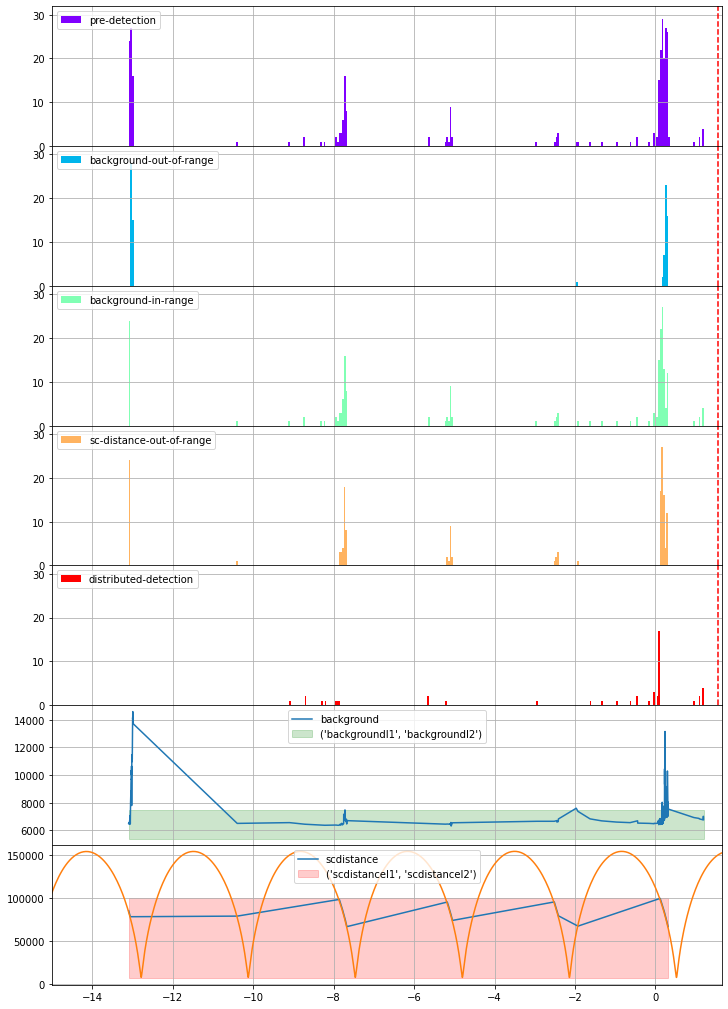

In [7]:

from matplotlib.pyplot import cm
cm.rainbow

all_kinds = sorted(set([ e['event'] for e in events ]))
colors = cm.rainbow(np.linspace(0,1,len(all_kinds)))

f, axes = plt.subplots(len(all_kinds) + 2,1, figsize=(12,18), sharex=True)

ymax = 0

for i_kind, (event_kind, ax, color) in enumerate(zip(all_kinds, axes, colors)):    
    _events = [e for e in events if e['event'] == event_kind and e['time_s'] > t1_s]
    print(event_kind, len(_events))
    
    t = np.array([e['time_s'] for e in _events])
    
    tbin_s = 3600
    
    h = ax.hist(        
        (t-t0_s)/24./3600.,
#        [i_kind for e in _events],
        label=event_kind.split()[-1],
        bins=int((t.max()-t.min())/tbin_s),
        color=color,
    )
    
    i_max = h[0].argmax()
    print(f"since {(t.max() - t.min())/24/3600:.2g} days max of {h[0][i_max]} per {tbin_s} at {h[1][i_max]:.3g}")
    tbin_s
    
    if h[0].max() > ymax:
        ymax = h[0].max()
    
    ax.set_ylim([0,400])
    
    ax.legend(loc=2)
    
    ax.grid(True)
    
    ax.axvline((time.time() -t0_s)/24./3600., c='r', ls='--')
    
    
    #print(np.array([e['background'] for e in _events if 'background' in e]))
    

def plot_c(ax, c, **kwargs):
    t = np.array([e['time_s'] for e in events  if c in e])
    
    getv = lambda n,N=None: np.array([float(e[n]) for e in events if (N or n) in e])
    
    
    if isinstance(c, tuple):
        t = np.array([e['time_s'] for e in events  if c[0] in e])
        
        ax.fill_between(
            (t-t0_s)/24./3600,
            getv(c[0]),
            getv(c[1]),        
            label=str(c),
            alpha=0.2,
            **kwargs
        )
    else:
        ax.plot(
            (t-t0_s)/24./3600,
            getv(c),        
            label=c,
            **kwargs
        )
    ax.legend()

plot_c(axes[-2], 'background')
plot_c(axes[-2], ('backgroundl1', 'backgroundl2'), color="green")
axes[-2].grid()

plot_c(axes[-1], 'scdistance')
axes[-1].plot(
    np.concatenate(
        [orbit['TIME'] for orbit in orbits]
    ) - t0_ijd, 
    np.concatenate(
        [orbit['RDIST'] for orbit in orbits]
    )
)
plot_c(axes[-1], ('scdistancel1', 'scdistancel2'), color="red")
axes[-1].grid()


plt.subplots_adjust(hspace=0)

for ax in axes[:-2]:    
    ax.set_ylim([0, ymax*1.1])

#plt.xlabel(f"days before {time.strftime('%Y-%d-%m %H:%M:%S', t0)}")

plt.xlim([-100, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.savefig("incident-long-history.png")

plt.xlim([-15, 
          (time.time() -t0_s)/24./3600. + 0.1])
plt.savefig("incident-past-history.png")

#plt.xlim([-1, 
#          (time.time() -t0_s)/24./3600. + 0.1])

#plt.savefig("incident-log.png")


# Conclusion

this was the most impactful radiation belt background variation, the most triggers at least since 2 years.

this exact sort of trigger excess has regular background but was near belt edge. It could be mitigated by changing belt limit, if it continues to be problematic.


second pass showed similar behavior: RB is about 10% higher. It is difficult to veto with background, only orbit limit.